In [1]:
import matplotlib.pyplot as plt
import pysam
import math
import numpy as np

In [28]:
files = {'ctrl1':46009296,'ctrl2':31871548,'ko1':34844114,'ko2':21268455}
count_list={}
for file in files.keys():
    print(file)
    bam_file = pysam.AlignmentFile("res_modified/sorted_"+file+".bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 105100640 
    end_position = 105100730

    # iterate over the reads that overlap the region of interest
    count = 0
    umi_counts = {}
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and not read.is_duplicate and read.is_reverse and read.get_tag('RE') =='E' and read.mapping_quality !=0 :
            print(read.reference_start)
            print(read.reference_end)
# #             print(read.nam)
            
#             print('kkkkkkk')
            umi = read.get_tag("UB")
#             print(read.get_tags())
            try:
                cell_barcode = read.get_tag("CB")
            except:
                cell_barcode='empty'
            
            if cell_barcode not in umi_counts:
                umi_counts[cell_barcode] = set()
            umi_counts[cell_barcode].add(umi)

            
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)   
    for cell_barcode in umi_counts:
        num_umis = len(np.unique(umi_counts[cell_barcode]))
#         print(cell_barcode,num_umis)
        count += num_umis

            
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Normalized # UMI mapped to exon 2 + Inserted Sequence')
plt.show()


ctrl1
105100271
105100750


TypeError: get_overlap() takes exactly 2 positional arguments (0 given)

Number of reads overlapping region: 1.5045756732212085e-06


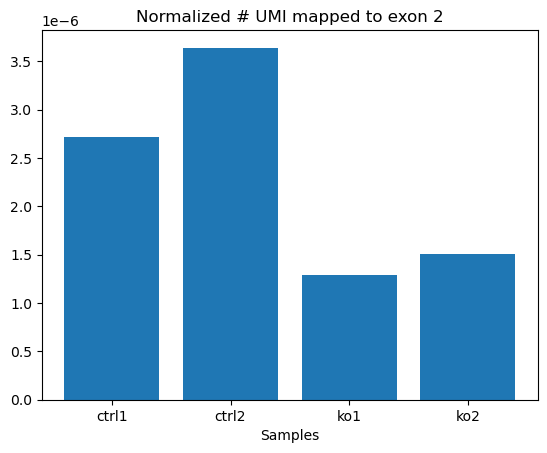

In [9]:
files = {'ctrl1':46009296,'ctrl2':31871548,'ko1':34844114,'ko2':21268455}
count_list={}
for file in files.keys():
    bam_file = pysam.AlignmentFile("bams/"+file+"/outs/gex_possorted_bam.bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 105100590 
    end_position = 105100761

    # iterate over the reads that overlap the region of interest
    count = 0
    umi_counts = {}
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and not read.is_duplicate  and read.is_reverse and read.get_tag('RE') =='E' and  read.mapping_quality !=0 :
            umi = read.get_tag("UB")
#             print(read.get_tags())
            try:
                cell_barcode = read.get_tag("CB")
            except:
                cell_barcode='empty'
            
            if cell_barcode not in umi_counts:
                umi_counts[cell_barcode] = set()
            umi_counts[cell_barcode].add(umi)

            
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)   
    for cell_barcode in umi_counts:
        num_umis = len(np.unique(umi_counts[cell_barcode]))
#         print(cell_barcode,num_umis)
        count += num_umis/files[file]

            
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Normalized # UMI mapped to exon 2')
plt.show()


In [ ]:
bam_file.close()  # Close the BAM file

bam_file = pysam.AlignmentFile("bams/"+file+"/outs/gex_possorted_bam.bam", "rb")

count_list={}

for read in bam_file:
    try:
        count_list.append(read.get_tags("CB"))
    except:
        continue

In [1]:
count_list

NameError: name 'count_list' is not defined

Number of reads overlapping region: 170


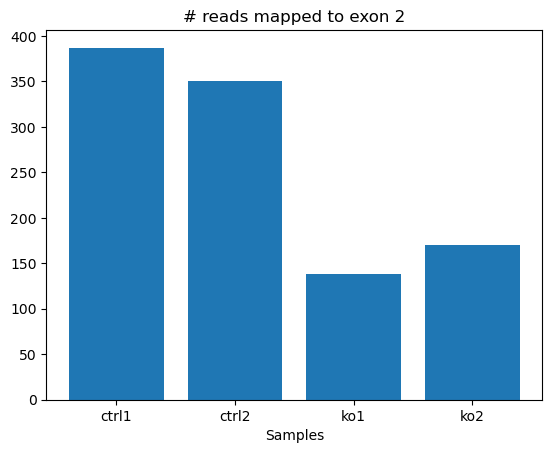

In [8]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bams/"+file+"/outs/gex_possorted_bam.bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 105100590 
    end_position = 105100761

    # iterate over the reads that overlap the region of interest
    count = 0
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and read.is_reverse and read.get_tag('RE') =='E' and  read.mapping_quality !=0 and read.mapping_quality>0:
    #         print (read.reference_start)
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)   

            count += 1
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('# reads mapped to exon 2')
plt.show()


Number of reads overlapping region: 207


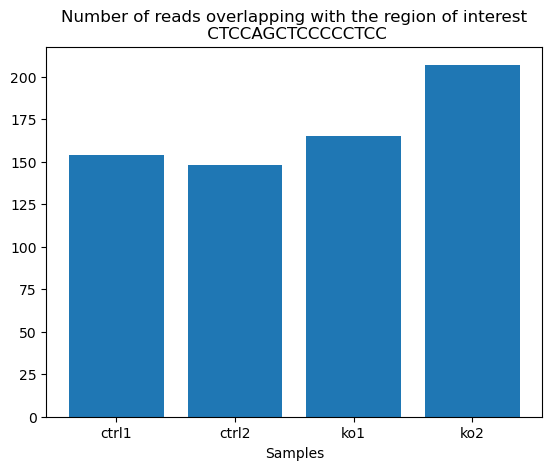

In [3]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bam-ko/sorted_"+file+".bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 24094
    end_position = 24110

    # iterate over the reads that overlap the region of interest
    count = 0
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and read.is_reverse and read.get_tag('RE') =='E' and read.mapping_quality!=0 and read.mapping_quality>0:
    #         print (read.reference_start)
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)        
            count += 1
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Number of reads overlapping with the region of interest\n CTCCAGCTCCCCCTCC')
plt.show()


Number of reads overlapping region: 196


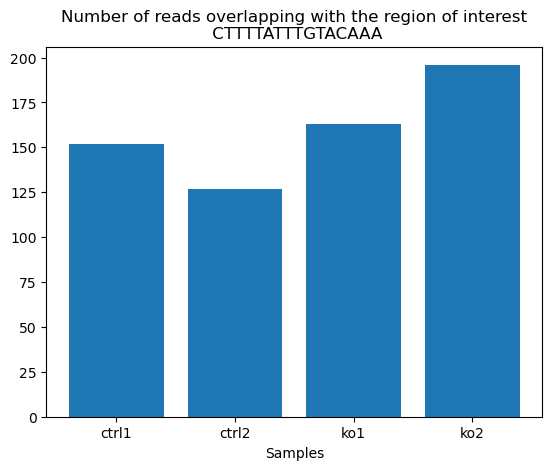

In [4]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bam-ko/sorted_"+file+".bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 24193
    end_position = 24209

    # iterate over the reads that overlap the region of interest
    count = 0
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and read.is_reverse and read.get_tag('RE') =='E' and read.mapping_quality!=0 and read.mapping_quality>0:
    #         print (read.reference_start)
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)        
            count += 1
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Number of reads overlapping with the region of interest\n CTTTTATTTGTACAAA')
plt.show()

Number of reads overlapping region: 208


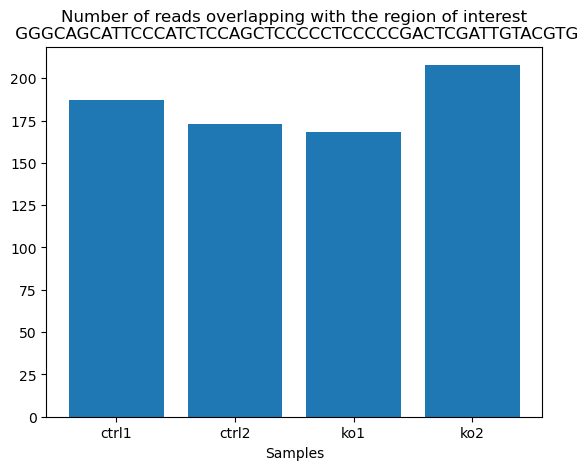

In [5]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bam-ko/sorted_"+file+".bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 24084
    end_position = 24134

    # iterate over the reads that overlap the region of interest
    count = 0
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and read.is_reverse and read.get_tag('RE') =='E' and read.mapping_quality!=0 and read.mapping_quality>0:
    #         print (read.reference_start)
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)        
            count += 1
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Number of reads overlapping with the region of interest\n GGGCAGCATTCCCATCTCCAGCTCCCCCTCCCCCGACTCGATTGTACGTG')
plt.show()


Number of reads overlapping region: 199


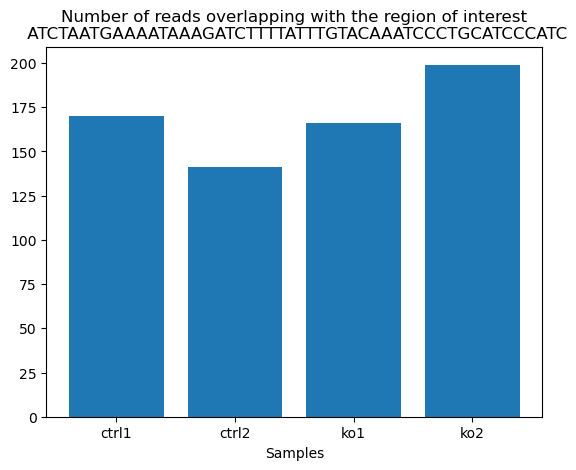

In [6]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bam-ko/sorted_"+file+".bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 24179
    end_position = 24229

    # iterate over the reads that overlap the region of interest
    count = 0
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and read.is_reverse and read.get_tag('RE') =='E' and read.mapping_quality!=0 and read.mapping_quality>0:
    #         print (read.reference_start)
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
            count += 1
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Number of reads overlapping with the region of interest\n ATCTAATGAAAATAAAGATCTTTTATTTGTACAAATCCCTGCATCCCATC')
plt.show()


Number of reads overlapping region: 209


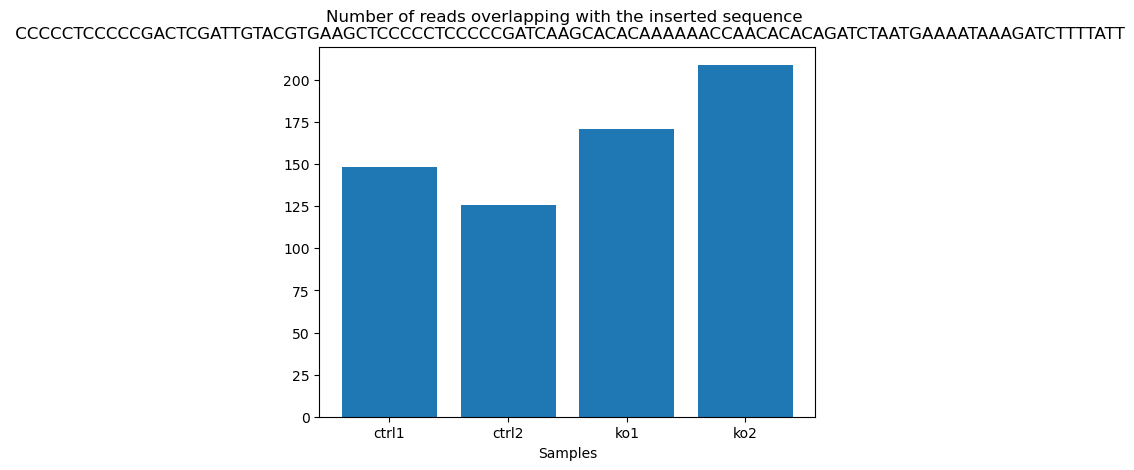

In [7]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bam-ko/sorted_"+file+".bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 24107
    end_position = 24206

    # iterate over the reads that overlap the region of interest
    count = 0
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if not read.is_unmapped and read.is_reverse and read.get_tag('RE') =='E' and read.mapping_quality!=0 and read.mapping_quality>0:
    #         print (read.reference_start)
    #         print (read.reference_end)
    #         print (read.query_length)        
    #         print(read.mapping_quality)
    #         print(read.query_name)        
            count += 1
    bam_file.close()  # Close the BAM file
    count_list[file]=count
print("Number of reads overlapping region:", count)

fig, ax = plt.subplots()
ax.bar(count_list.keys(), count_list.values())
ax.set_xlabel('Samples')
ax.set_title('Number of reads overlapping with the inserted sequence \n CCCCCTCCCCCGACTCGATTGTACGTGAAGCTCCCCCTCCCCCGATCAAGCACACAAAAAACCAACACACAGATCTAATGAAAATAAAGATCTTTTATT')
plt.show()


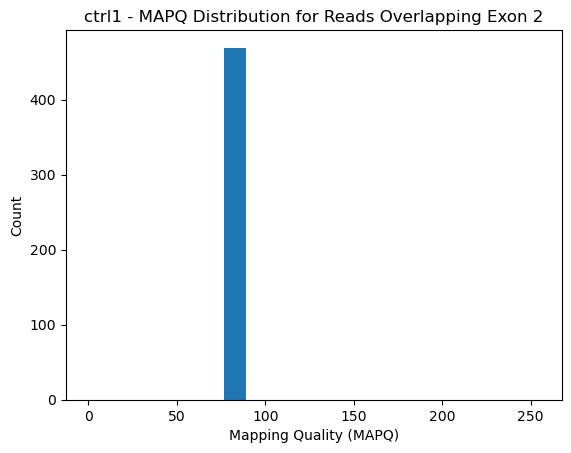

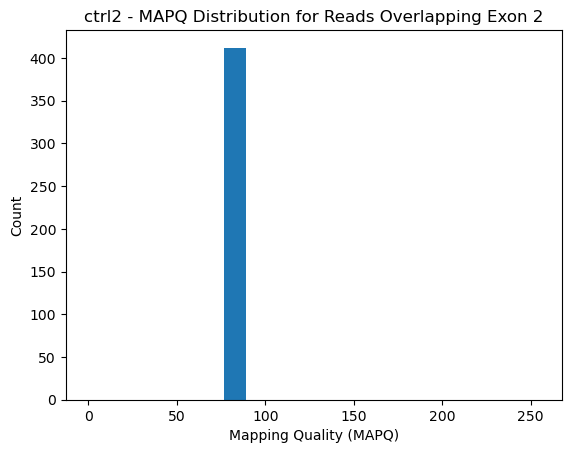

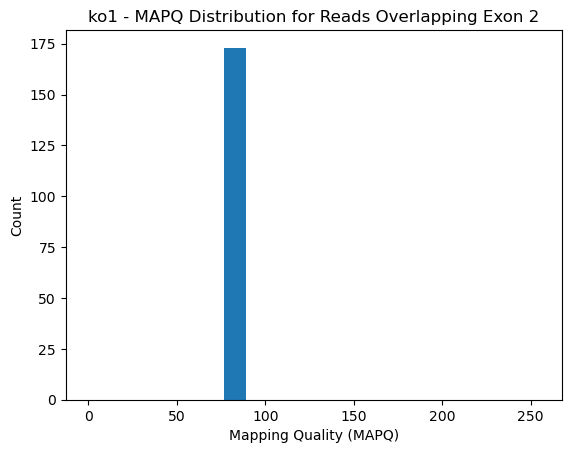

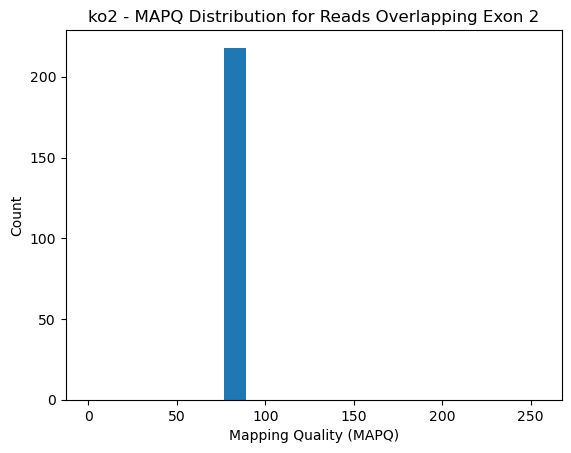

In [11]:
files = ['ctrl1','ctrl2','ko1','ko2']
count_list={}
for file in files:
    bam_file = pysam.AlignmentFile("bams/"+file+"/outs/gex_possorted_bam.bam", "rb")

    # define the region of interest
    chromosome = "chr2"
    start_position = 105100590 
    end_position = 105100761

    # Get the list of MAPQ values for reads overlapping the region
    mapq_values = []
    for read in bam_file.fetch(chromosome, start_position, end_position):
        if read.is_unmapped :
            continue
#         print(read.mapping_quality)
        mapq_values.append(read.query_length)

    # Plot the distribution of MAPQ values
    plt.hist(mapq_values, bins=20, range=(0, 255))
    plt.xlabel("Mapping Quality (MAPQ)")
    plt.ylabel("Count")
    plt.title(file + " - MAPQ Distribution for Reads Overlapping Exon 2")
    plt.show()

    bam_file.close()





In [8]:
bam_file = pysam.AlignmentFile("bam-ko/sorted_ko1.bam", "rb")

mapped_reads = 0
for read in bam_file.fetch(until_eof=True):
    if not read.is_unmapped and read.mapping_quality > 0 and read.mapping_quality != 255:
        mapped_reads += 1

bam_file.close()  # Close the BAM file

print("Number of mapped reads:", mapped_reads)

Number of mapped reads: 646580


In [46]:
bam_file = pysam.AlignmentFile("bam-ko/sorted_ko1.bam", "rb")

total_reads = 0
for reference_name in bam_file.references:
    total_reads += bam_file.count(reference_name)


bam_file.close()  # Close the BAM file

print("Number of mapped reads:", mapped_reads)

Number of mapped reads: 2818842


In [47]:
646580/2818842

0.22937787928518164

In [72]:

bam_file = pysam.AlignmentFile("bams/sorted_ctrl1.bam", "rb")
total_reads = 0
correctly_mapped_reads = 0

for read in bam_file:
    if not read.is_unmapped and read.mapping_quality > 0:
        total_reads += 1
        if read.cigarstring.count("M") == read.reference_length:
            correctly_mapped_reads += 1

fraction_correctly_mapped = correctly_mapped_reads / total_reads

[E::idx_find_and_load] Could not retrieve index file for 'bams/ctrl1.bam'


In [73]:
fraction_correctly_mapped

0.0

In [124]:
len('CTCCAGCTCCCCCTCC')

16

In [9]:
24198+16

24214